In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

scaledFeatures = pd.read_csv("../../data/sets/insurance_features_scaled.csv")
maxClusters = 25
sb.set()

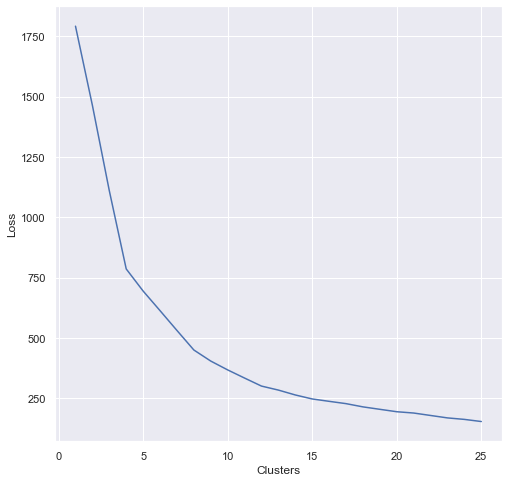

In [2]:
### Elbow method for KMeans ###

losses = []
for i in range(1, maxClusters + 1):
    km = KMeans(n_clusters = i, random_state = 20)
    km.fit(scaledFeatures)
    losses.append(km.inertia_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

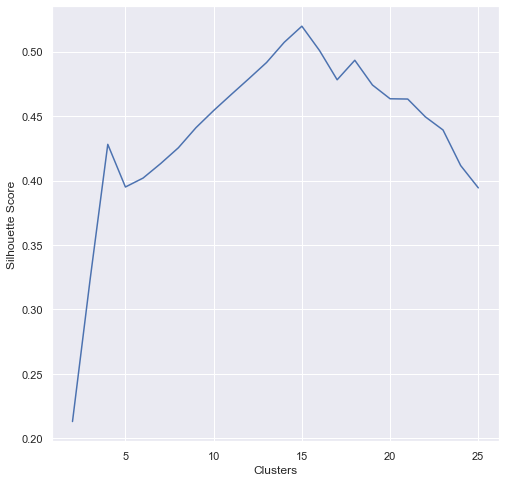

In [3]:
### Silhouette analysis for KMeans ###

scores = []
for i in range(2, maxClusters + 1):
    km = KMeans(n_clusters = i, random_state = 20)
    km.fit(scaledFeatures)
    score = silhouette_score(scaledFeatures, km.labels_)
    scores.append(score)

plt.figure(figsize = (8, 8))
plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

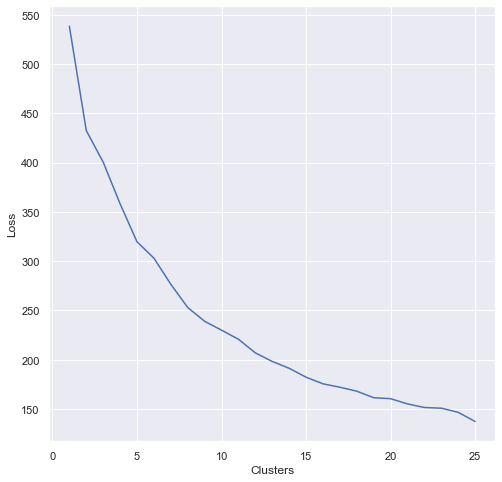

In [4]:
### Elbow method for KPrototypes ###

losses = []
for i in range(1, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    losses.append(kp.cost_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

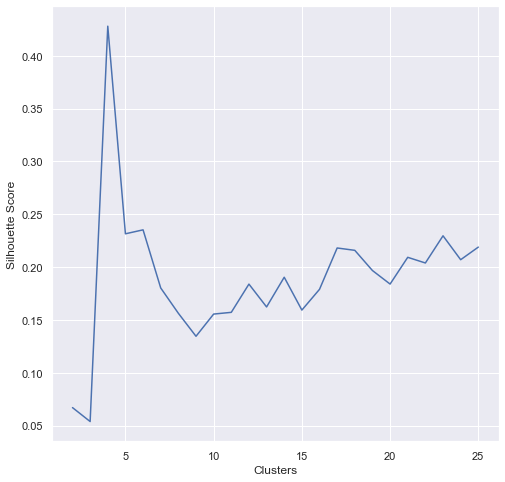

In [5]:
### Silhouette analysis for KPrototypes ###

scores = []
for i in range(2, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    score = silhouette_score(scaledFeatures, kp.labels_)
    scores.append(score)

plt.figure(figsize = (8,8))
plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

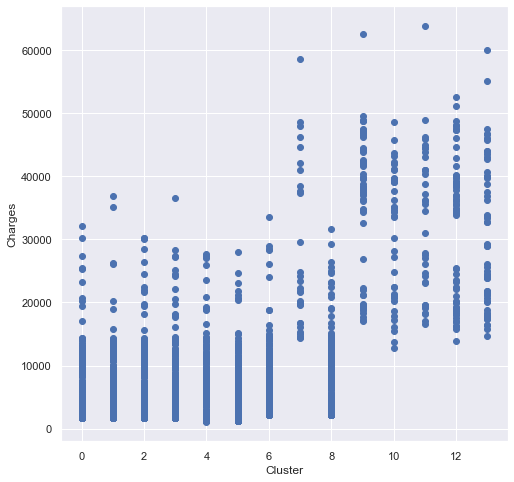

In [27]:
### Analyze features after KMeans clustering ###

clusterCount = 14
cleanInsurance = pd.read_csv("../../data/sets/insurance_clean.csv")

km = KMeans(n_clusters = clusterCount)
clusters = km.fit_predict(scaledFeatures)
cleanInsurance["cluster"] = clusters

plt.figure(figsize = (8,8))
plt.scatter(cleanInsurance["cluster"], cleanInsurance["charges"])
plt.xlabel("Cluster")
plt.ylabel("Charges")
plt.show()

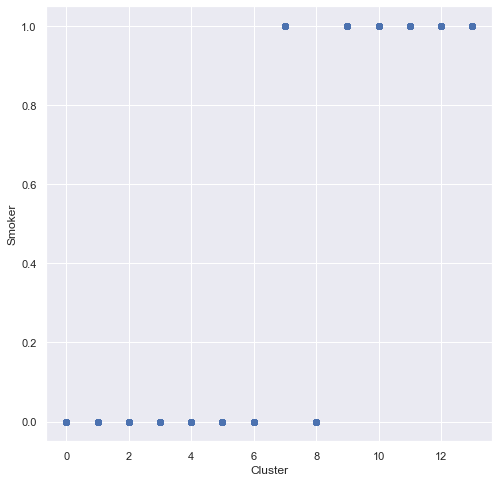

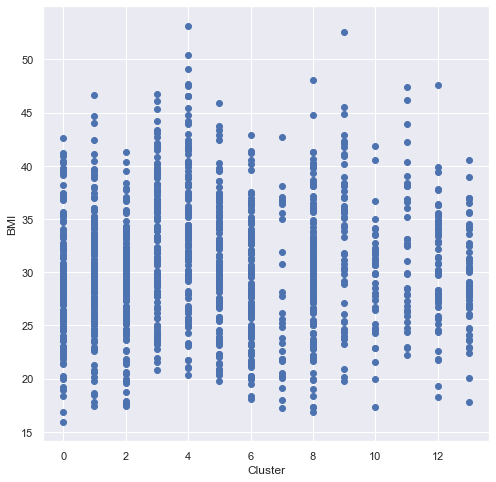

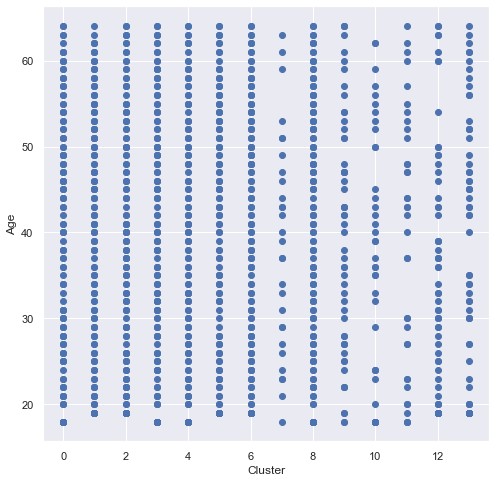

In [28]:
### Analysis cont. so does not turn into scrolling view ###

plt.figure(figsize = (8, 8))
plt.scatter(cleanInsurance["cluster"], cleanInsurance["smoker"])
plt.xlabel("Cluster")
plt.ylabel("Smoker")
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(cleanInsurance["cluster"], cleanInsurance["bmi"])
plt.xlabel("Cluster")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(cleanInsurance["cluster"], cleanInsurance["age"])
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()